In [3]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
#reading the dataset
data=pd.read_csv("E:/DataSet/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
#encoding the categorical data
labelencoder=LabelEncoder()
data['Undergrad']=labelencoder.fit_transform(data['Undergrad'])
data['Urban']=labelencoder.fit_transform(data['Urban'])
data['Marital.Status']=labelencoder.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


## EDA

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

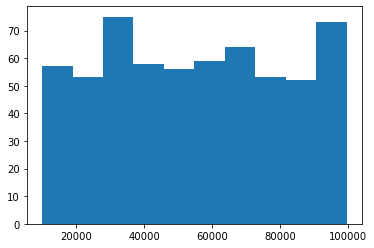

In [6]:
plt.hist(data['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e41abdfb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2e41ac81280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e41abdf820>],
 'medians': [<matplotlib.lines.Line2D at 0x2e41ac81940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e41ac81ca0>],
 'means': []}

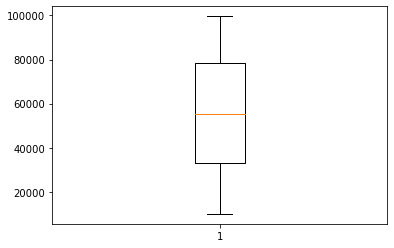

In [7]:
plt.boxplot(data["Taxable.Income"])

In [10]:
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.793333,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,1.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


### Developing logic 

In [8]:
for i in range(len(data['Taxable.Income'])):
    if data['Taxable.Income'] [i] >=30000:
        data['Taxable.Income'] [i]=1
    else:
        data['Taxable.Income'] [i]=0

<ipython-input-8-9b7c6eefe8a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'] [i]=1
<ipython-input-8-9b7c6eefe8a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'] [i]=0


In [9]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [13]:
x=data.iloc[:, data.columns != 'Taxable.Income']
y=data['Taxable.Income']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=30)

### Building the Random Forest Classifier using Entropy Criteria

In [49]:
def best_tree(x_train, y_train, x_test, y_test):
    tree_score = {}
    for tree in range(1,20):
        model = RandomForestClassifier(n_estimators=tree,criterion = 'entropy')
        model.fit(x_train,y_train)
        tree_score[tree] = round(model.score(x_test, y_test)*100,2)
    maximum_score = max(tree_score.values())    
    for key in tree_score.keys():
        if tree_score[key] == maximum_score:
            best_key = key
            print(f"the optimum number of trees is: {key} with the score of {maximum_score}")
            break
    model = RandomForestClassifier(n_estimators=best_key,criterion = 'entropy')
    model.fit(x_train,y_train)
    print(f"Accuracy: {round(model.score(x_test, y_test)*100,2)}%")
    return model

In [51]:
model=best_tree(x_train,y_train,x_test,y_test)

the optimum number of trees is: 18 with the score of 76.67
Accuracy: 72.5%


In [52]:
pred1=model.predict(x_test)
pd.Series(pred1).value_counts()

1    109
0     11
dtype: int64

In [53]:
print("Accuracy= {}%".format(round(np.mean(pred1==y_test)*100,2)))

Accuracy= 72.5%


In [54]:
fn=list(x.columns)
imp_features1=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
imp_features1

City.Population    0.539861
Work.Experience    0.316271
Marital.Status     0.063815
Urban              0.042364
Undergrad          0.037688
dtype: float64

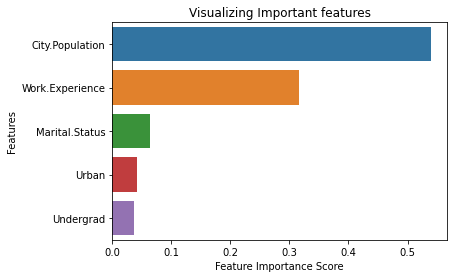

In [55]:
sns.barplot(x=imp_features1,y=imp_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

These are the important features for the classification of high sales and low sales as predicted by random forest by entropy method

### Building Random Forest using Gini Criteria

In [64]:
def best_tree1(x_train, y_train, x_test, y_test):
    tree_score = {}
    for tree in range(1,20):
        model1 = RandomForestClassifier(n_estimators=tree,criterion = 'gini')
        model1.fit(x_train,y_train)
        tree_score[tree] = round(model1.score(x_test, y_test)*100,2)
    maximum_score = max(tree_score.values())    
    for key in tree_score.keys():
        if tree_score[key] == maximum_score:
            best_key = key
            print(f"the optimum number of trees is: {key} with the score of {maximum_score}")
            break
    model1 = RandomForestClassifier(n_estimators=best_key,criterion = 'gini')
    model1.fit(x_train,y_train)
    print(f"Accuracy: {round(model1.score(x_test, y_test)*100,2)}%")
    return model1

In [65]:
model1=best_tree1(x_train,y_train,x_test,y_test)

the optimum number of trees is: 12 with the score of 75.0
Accuracy: 73.33%


In [66]:
pred2=model1.predict(x_test)
pd.Series(pred2).value_counts()

1    110
0     10
dtype: int64

In [67]:
print("Accuracy= {}%".format(round(np.mean(pred2==y_test)*100,2)))

Accuracy= 73.33%


In [68]:
imp_features2=pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False)
imp_features2

City.Population    0.560969
Work.Experience    0.287297
Marital.Status     0.060469
Undergrad          0.049986
Urban              0.041278
dtype: float64

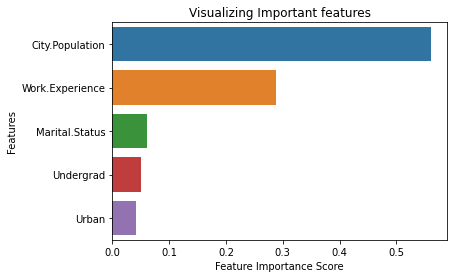

In [69]:
sns.barplot(x=imp_features2,y=imp_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

These are the important features for classification of sales as high or low as predicted by Random Forest model by GINI criteria

##### Hence we can conclude that in this case the GINI forrest gives better accuracy than the ENTROPY forest. And the most important features for classification of sales are predicted